## Travel Expense Rejection Analysis (Flag 20)

### Dataset Description
The dataset consists of 500 entries simulating ServiceNow fm_expense_line table, which records various attributes of financial expenses. Key fields include 'number', 'opened_at', 'amount', 'state', 'short_description', 'ci', 'user', 'department', 'category', 'process_date', 'source_id', and 'type'. This table documents the flow of financial transactions by detailing the amount, departmental allocation, and the nature of each expense. Provides a clear view of organizational expenditures across different categories, highlighting both the timing and the approval state of each financial entry.

### Your Task
**Goal**: To identify and rectify the causes of high rejection rates in travel expenses to ensure that submissions  align with organizational policies.

**Role**: Expense Audit Analyst

**Difficulty**: 2 out of 5. This task requires key analysis of expense reports to detect commonalities in rejections.

**Category**: Finance Management


### Import Necessary Libraries
This cell imports all necessary libraries required for the analysis. This includes libraries for data manipulation, data visualization, and any specific utilities needed for the tasks. 

In [1]:
import argparse
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import date_range

### Load Dataset
This cell loads the dataset to be analyzed. The data is stored in the from a CSV file, and is imported into a DataFrame. It involves specifying the path to the dataset, using pandas to read the file, and confirming its successful load by inspecting the first few table entries.

In [2]:
dataset_path = "csvs/flag-20.csv"
flag_data = pd.read_csv(dataset_path)
df = pd.read_csv(dataset_path)
flag_data.head()


,category,department,opened_at,source_id,type,number,processed_date,amount,state,user,short_description,ci
0,Assets,Customer Support,2024-02-28 23:30:00,MOW-21341062,NaN,EXP00000000,2024-03-05 20:18:58.865466754,5345,Processed,Marianne Earman,Procurement of new hardware asset,Dell Latitude 3410
1,Assets,Sales,2024-04-11 16:24:00,JCZ-14840476,NaN,EXP00000001,2024-04-26 15:59:06.170441179,8761,Processed,Carolina Kinlaw,Automated creation of new hardware asset,Dell OptiPlex 7070 Desktop
2,Services,Sales,2023-07-12 07:29:00,IYI-40671468,NaN,EXP00000002,2023-07-21 22:46:22.903623363,834,Processed,Lacy Hyten,Newly implemented cloud service,AWS EC2 Instance
3,Assets,Sales,2023-11-30 14:53:00,ZQT-96922333,NaN,EXP00000003,NaN,5109,Submitted,Howard Johnson,Automatically generated asset entry for hardwa...,Dell Latitude 7410
4,Assets,Customer Support,2023-09-13 08:47:00,QTZ-80951096,NaN,EXP00000004,2023-09-22 11:30:54.396673685,3371,Processed,Sue Haakinson,Addition of new hardware asset,Dell Latitude 6520



### **Question 1: How do rejection rates for travel expenses compare to other categories within the expense reports?**

#### Plot proportion of declined expenses by category

This plot provides a comparison of rejection rates across different expense categories within the organization. By plotting the proportion of declined expenses, this graph helps in identifying which categories, particularly 'Travel', face higher scrutiny or issues in approval processes compared to others. 

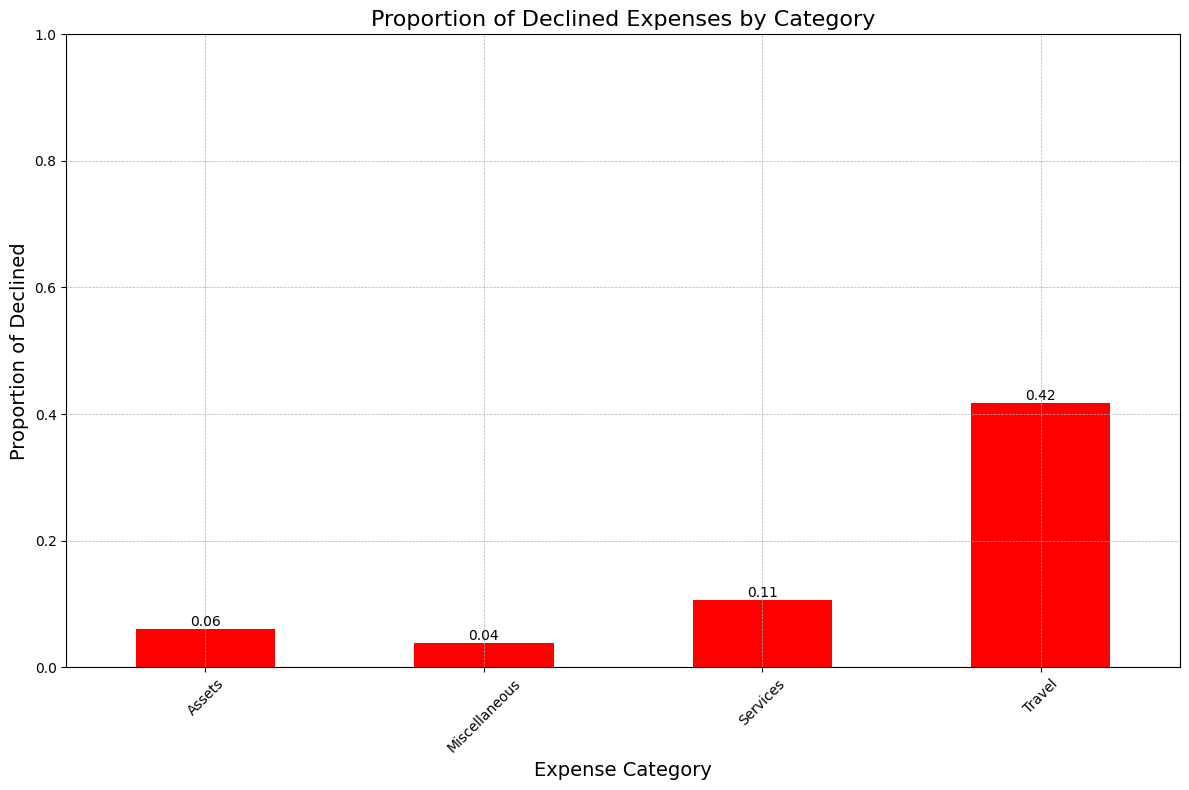

In [3]:
import matplotlib.pyplot as plt

# Group the data by category and state, then count occurrences
category_state_counts = flag_data.groupby(['category', 'state']).size().unstack(fill_value=0)

# Calculate proportions of each state within each category
category_state_proportions = category_state_counts.div(category_state_counts.sum(axis=1), axis=0)

# Plot the data, focusing only on the 'Declined' state
fig, ax = plt.subplots(figsize=(12, 8))
declined_proportions = category_state_proportions['Declined']
declined_proportions.plot(kind='bar', color='red', ax=ax)

# Add titles and labels
ax.set_title('Proportion of Declined Expenses by Category', fontsize=16)
ax.set_xlabel('Expense Category', fontsize=14)
ax.set_ylabel('Proportion of Declined', fontsize=14)
ax.set_ylim(0, 1)  # Set y-axis limit to show proportions from 0 to 1

# Show grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to not cut off labels

# Adding numeric labels on top of the bars
for i, value in enumerate(declined_proportions):
    ax.text(i, value, f"{value:.2f}", ha='center', va='bottom', fontsize=10, color='black')

# Show the plot
plt.show()


#### Generate JSON Description for the Insight

In [4]:
{
    "data_type": "comparative",
    "insight": "There are disproportionately high rejection rates for Travel expenses",
    "insight_value": {
        "description": "Travel expenses are rejected at a significantly higher rate than other categories, indicating potential issues with how these expenses are understood or submitted."
    },
    "plot": {
        "plot_type": "bar",
        "title": "Rejection Rates by Expense Category",
        "x_axis": {
            "name": "Expense Category",
            "value": ["Travel", "Assets", "Services", "Miscellaneous"],
            "description": "This axis categorizes expenses into different types, highlighting the focus on Travel, Assets, Services, and Miscellaneous expenses."
        },
        "y_axis": {
            "name": "Rejection Rate",
            "value": [0.42, 0.06, 0.11, 0.04],
            "description": "This axis displays the proportion of expenses declined within each category, emphasizing the high rejection rate in the Travel category."
        },
        "description": "The bar chart clearly illustrates the rejection rates across different expense categories, with the Travel category experiencing a rejection rate of 42%, which is substantially higher than the rates for Assets (6%), Services (11%), and Miscellaneous (4%). This stark contrast suggests a specific challenge within the Travel expense category that may stem from complex policies or frequent non-compliance."
    },
    "question": "How do rejection rates for travel expenses compare to other categories within the expense reports?",
    "actionable_insight": "To address the high rejection rates in the Travel category, it is crucial to review and possibly simplify the travel expense policies to ensure they are clearly understood and easy to follow. Additionally, providing more targeted training and resources for employees on how to properly file travel expenses could help reduce misunderstandings and improve compliance. Regular feedback sessions to discuss common errors and adjustments to the policy based on real-world issues could also be beneficial."
}


{'data_type': 'comparative',
 'insight': 'There are disproportionately high rejection rates for Travel expenses',
 'insight_value': {'description': 'Travel expenses are rejected at a significantly higher rate than other categories, indicating potential issues with how these expenses are understood or submitted.'},
 'plot': {'plot_type': 'bar',
  'title': 'Rejection Rates by Expense Category',
  'x_axis': {'name': 'Expense Category',
   'value': ['Travel', 'Assets', 'Services', 'Miscellaneous'],
   'description': 'This axis categorizes expenses into different types, highlighting the focus on Travel, Assets, Services, and Miscellaneous expenses.'},
  'y_axis': {'name': 'Rejection Rate',
   'value': [0.42, 0.06, 0.11, 0.04],
   'description': 'This axis displays the proportion of expenses declined within each category, emphasizing the high rejection rate in the Travel category.'},
  'description': 'The bar chart clearly illustrates the rejection rates across different expense categories, 

### **Question 2:  What is the distribution of Expense Reports by department?**

#### Number of Expense Reports by Category

This bar chart illustrates distribution of expense reports across  categories within organization. By visualizing these number of reports per category, this plot highlights which expense categories are most commonly reported and potentially which ones are under more scrutiny or utilized more frequently. 

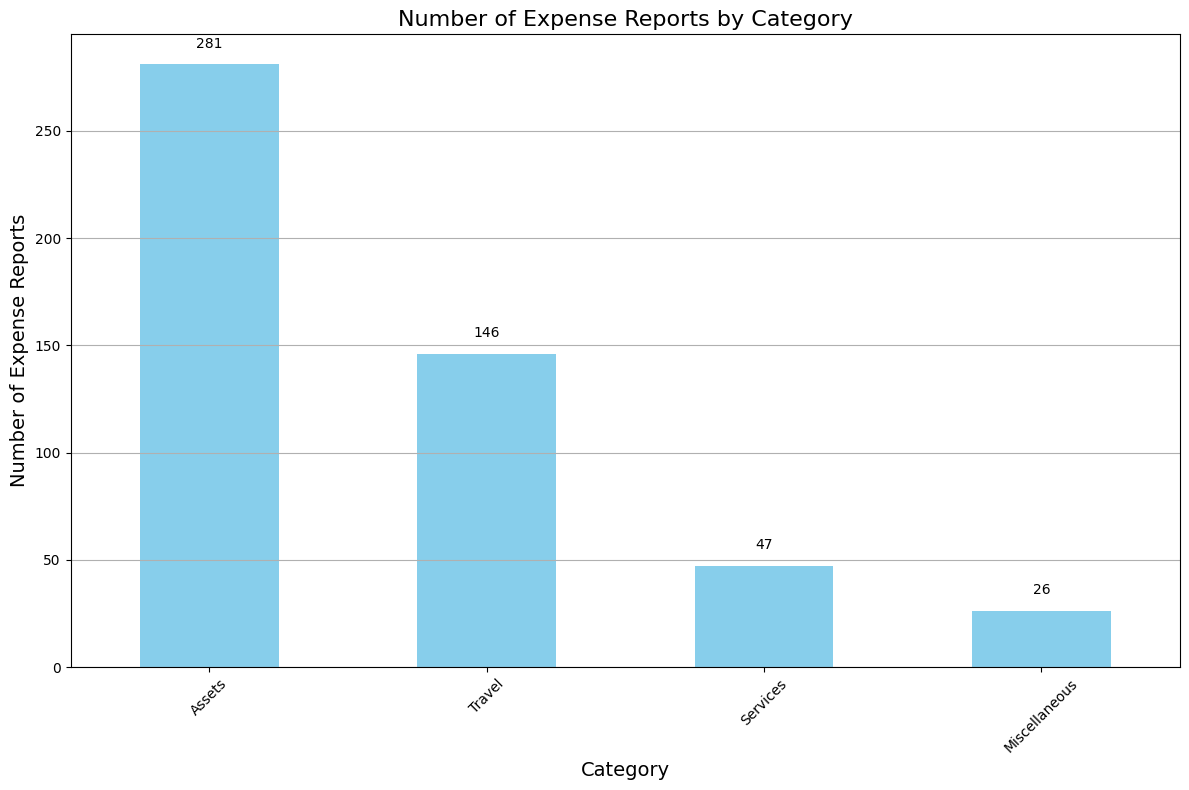

In [5]:
import matplotlib.pyplot as plt

# Count the number of expense reports per department
department_counts = flag_data['category'].value_counts()

# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))
department_counts.plot(kind='bar', color='skyblue', ax=ax)

# Add titles and labels
ax.set_title('Number of Expense Reports by Category', fontsize=16)
ax.set_xlabel('Category', fontsize=14)
ax.set_ylabel('Number of Expense Reports', fontsize=14)

# Show grid
ax.grid(axis='y')  # Only horizontal grid lines for readability

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to not cut off labels

# Adding numeric labels on top of the bars for clarity
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.show()

#### Generate JSON Description for the Insight

In [6]:
{
    "data_type": "descriptive",
    "insight": "There is a variable distribution of Expense Reports across categories",
    "insight_value": {
        "description": "While Travel expenses are frequently rejected, they are not the most submitted category. Assets category dominates the submission volume."
    },
    "plot": {
        "plot_type": "bar",
        "title": "Distribution of Expense Reports by Category",
        "x_axis": {
            "name": "Expense Category",
            "value": ["Assets", "Travel", "Services", "Miscellaneous"],
            "description": "This axis categorizes expenses into different types, including Assets, Travel, Services, and Miscellaneous."
        },
        "y_axis": {
            "name": "Number of Expense Reports",
            "value": {
                "Assets": "281",
                "Travel": "146",
                "Services": "47",
                "Miscellaneous": "26"
            },
            "description": "This axis displays the number of expense reports submitted within each category, indicating a higher volume of submissions for Assets than for other categories."
        },
        "description": "The bar chart illustrates that the Assets category has the highest number of submissions at 281, followed by Travel with 146, Services with 47, and Miscellaneous with 26. This distribution shows that despite high rejection rates, the Travel category does not lead in submission frequency but remains significant."
    },
    "question": "What is the distribution of Expense Reports by Category?",
    "actionable_insight": "Understanding that Assets lead in the number of submissions, it's important to closely monitor and manage this category to ensure compliance and proper allocation of resources. For the Travel category, which has a high rejection rate but significant submission volume, refining submission guidelines and improving training on how to correctly file Travel expenses could help reduce rejections and streamline processing. This could involve clarifying allowable expenses within the Travel category and ensuring that all employees are aware of and understand these policies."
}


{'data_type': 'descriptive',
 'insight': 'There is a variable distribution of Expense Reports across categories',
 'insight_value': {'description': 'While Travel expenses are frequently rejected, they are not the most submitted category. Assets category dominates the submission volume.'},
 'plot': {'plot_type': 'bar',
  'title': 'Distribution of Expense Reports by Category',
  'x_axis': {'name': 'Expense Category',
   'value': ['Assets', 'Travel', 'Services', 'Miscellaneous'],
   'description': 'This axis categorizes expenses into different types, including Assets, Travel, Services, and Miscellaneous.'},
  'y_axis': {'name': 'Number of Expense Reports',
   'value': {'Assets': '281',
    'Travel': '146',
    'Services': '47',
    'Miscellaneous': '26'},
   'description': 'This axis displays the number of expense reports submitted within each category, indicating a higher volume of submissions for Assets than for other categories.'},
  'description': 'The bar chart illustrates that the A

### **Question 3: Are the guidelines for submitting travel expenses more complex compared to other categories?**


To adequately address this question, additional data or insights from experts who are familiar with the company's expense reporting policies are necessary. It is recommended that the organization conduct a thorough review of the written guidelines for each expense category or consult with policy managers. Gathering qualitative feedback from employees on their experiences with submitting expenses in various categories could also provide valuable insights. Implementing a survey or a series of focus groups to discuss the challenges and perceptions related to expense submission guidelines could uncover the complexity levels and any discrepancies between categories. This approach will not only clarify whether travel expense guidelines are indeed more complex but also help identify specific areas for simplification and improvement.

### **Question 4: What training or resources are currently available to employees submitting travel expenses?**


Insufficient Data on Training or Resources for Travel Expense Submission

Given the high rejection rates in the Travel category and the absence of data on supportive measures, it is predictive to assume that existing resources or training may not be adequately addressing the needs of employees. This situation, if not improved, could lead to continued or increased rejections. It is recommended that the organization should proactively enhance its training programs and resources related to travel expenses. This could involve updating training modules to reflect current policies, creating more detailed guides or FAQs specifically for travel expenses, or implementing regular review sessions and feedback mechanisms to ensure that employees are well-informed and supported in making compliant submissions. Additionally, assessing the current support system through employee surveys or consultations could identify gaps and opportunities for improvement, potentially reducing the rate of expense rejections significantly.

### Summary of Findings (Flag 20):

1. **Trend in Expense Rejections**: This analysis focuses on the 'Travel' category within the organization's expense reports, which has been observed to have higher rejection rates compared to other expense categories. 
   
2. **Understanding Compliance Issues**: The data is essential for pinpointing lapses in policy compliance or misunderstandings about allowable expenses within the Travel category, which is crucial for managing financial resources effectively.
   
3. **Enhancing Policy Adherence**: By analyzing the patterns and reasons behind the rejections, the dataset serves as a foundation for modifying training or revising guidelines to improve compliance and reduce financial wastage.